# Convolution 연산 구현(Filter)

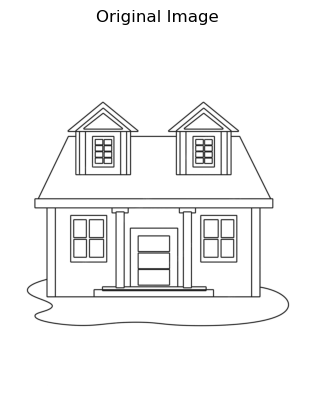

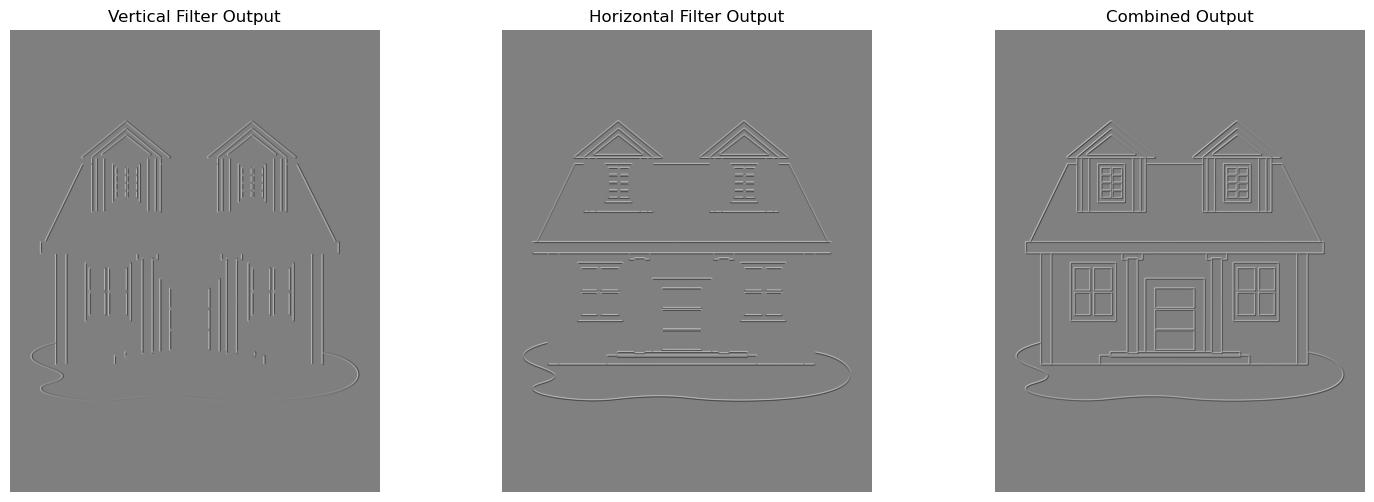

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open('house.jpg').convert('L')

image = np.array(image)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

vertical_filter = np.array([[1, 0, -1],
                            [1, 0, -1],
                            [1, 0, -1]])

horizontal_filter = np.array([[1, 1, 1],
                              [0, 0, 0],
                              [-1, -1, -1]])
# a1) convolution 연산 함수 작성하기. 
def apply_filter(image, filter):
    image_height, image_width = image.shape
    filter_height, filter_width = filter.shape
    # 코드
    output_height = image_height-filter_height+1
    output_width = image_width-filter_width+1
    output_image = np.zeros(output_height*output_width).reshape(output_height,output_width)
    for i in range(output_height):
        for j in range(output_width):
            output_image[i,j] = np.sum(image[i:i+filter_height,j:j+filter_width] * filter)
    return output_image

vertical_output = apply_filter(image, vertical_filter)

horizontal_output = apply_filter(image, horizontal_filter)

combined_output = vertical_output + horizontal_output

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(vertical_output, cmap='gray')
ax[0].set_title('Vertical Filter Output')
ax[0].axis('off')
ax[1].imshow(horizontal_output, cmap='gray')
ax[1].set_title('Horizontal Filter Output')
ax[1].axis('off')
ax[2].imshow(combined_output, cmap='gray')
ax[2].set_title('Combined Output')
ax[2].axis('off')
plt.show()

# Pooling 연산 구현(Pooling)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open('house.jpg').convert('L')

image = np.array(image)

vertical_filter = np.array([[1, 0, -1],
                            [1, 0, -1],
                            [1, 0, -1]])

horizontal_filter = np.array([[1, 1, 1],
                              [0, 0, 0],
                              [-1, -1, -1]])

# 위에서 만든 apply_filter 함수

vertical_output = apply_filter(image, vertical_filter)

horizontal_output = apply_filter(image, horizontal_filter)

def max_pooling(image, pool_size):
    image_height, image_width = image.shape
    pool_height, pool_width = pool_size
    
    # 코드
    
    return output_image

vertical_output_pool = max_pooling(vertical_output, (2, 2))
horizontal_output_pool = max_pooling(horizontal_output, (2, 2))

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(vertical_output, cmap='gray')
ax[0, 0].set_title('Vertical Filter Output')
ax[0, 0].axis('off')
ax[0, 1].imshow(horizontal_output, cmap='gray')
ax[0, 1].set_title('Horizontal Filter Output')
ax[0, 1].axis('off')
ax[1, 0].imshow(vertical_output_pool, cmap='gray')
ax[1, 0].set_title('Vertical Filter Output (Max Pooling)')
ax[1, 0].axis('off')
ax[1, 1].imshow(horizontal_output_pool, cmap='gray')
ax[1, 1].set_title('Horizontal Filter Output (Max Pooling)')
ax[1, 1].axis('off')
plt.show()

# MNIST CNN with PyTorch

필요한 Package 불러오기

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.datasets as dsets
import torchvision.transforms as transforms

from torch.utils.data import DataLoader

하이퍼파라미터

In [ ]:
num_epochs = 5
batch_size = 64
learning_rate = 0.001

MNIST 데이터 불러오기

In [ ]:
train_dataset = dsets.MNIST(
    root="MNIST_data/",
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)

test_dataset = dsets.MNIST(
    root="MNIST_data/",
    train=False,
    transform=transforms.ToTensor(),
    download=True,
)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True,
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True,
)

CNN 모델 정의

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))

        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))

        self.fc = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x =self.conv2(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)

        return x

CNN 모델 선언

In [ ]:
model = CNN()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

CNN 모델 학습

In [ ]:
for epoch in range(num_epochs):
    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()
        
        running_loss += loss.item()

        if i % 100 == 99:
            print(f'Epoch {epoch+1}, Batch {i+1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

CNN 모델 테스트

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')